<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/04_pytorch_dados_personalizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytorch para datasets proprios

## Cada tipo tem um "pytorch" proprio

* Texto - torchtext
* Audio - torchaudio
* Sistema de Recomendacao - torchrec
* Visao computacional - torchvision

Cada tipo tem uma biblioteca para funcoes de carregamento de dados e funcoes customizadas para o mesmo

## 0. Importando Pytorch e fazendo o selecionador de dispositivo

In [1]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [2]:
#Diagnostico de dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Conseguindo os dados

O dataset usado eh um sub dataset do Food101

O conjunto original possui 101 classes diferentes e 1000 imagens por classe, sendo 750 de treino e 250 para teste.
O sub conjunto possui apenas 3 classes(stake, pizza, sushi) e apenas 10% de imagens. +-75 para treino e =-25 para teste.
O Pq disso?
Segundo o professor, e importnte comecar projetos de ML de maineira pequena e ir incrementando conforme necessidade. Tal tecnica de da pela velocidade que se pode experimentar coisas novas com um conjunto pequeno que nao demora para ser processado e tranformado e treinando, bem como testado.

In [3]:
import requests
import zipfile
from pathlib import Path
#COnfigurando o caminho para a pasta "data"
data_path = Path("data/")
image_path = data_path / "pizza_stake_sushi"

#Se a pasta das imagens nao existe, iremos criar e baixar os dados d github
if image_path.is_dir():
  print(f"{image_path} Diretorio existente, pulando download...")
else:
  print(f"{image_path} nao existe, criando...")
  image_path.mkdir(parents=True, exist_ok=True)

#Baixzando os dados pizza, steak, sushi
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/HammadN98/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Baixando os dados...")
  f.write(request.content)

#Descompactando os dados
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Descompactando")
  zip_ref.extractall(image_path)

data/pizza_stake_sushi nao existe, criando...
Baixando os dados...
Descompactando


## 2. Tornando-se um com os dados(preparacao e exploracao)


In [4]:
import os
def walk_through_dir(dir_path):
  """Passa por todo o diretorio e retorna o conteudo"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Tem {len(dirnames)} diretorios e {len(filenames)} imagens no '{dirpath}")

In [5]:
walk_through_dir(image_path)

Tem 2 diretorios e 0 imagens no 'data/pizza_stake_sushi
Tem 3 diretorios e 0 imagens no 'data/pizza_stake_sushi/train
Tem 0 diretorios e 72 imagens no 'data/pizza_stake_sushi/train/sushi
Tem 0 diretorios e 78 imagens no 'data/pizza_stake_sushi/train/pizza
Tem 0 diretorios e 75 imagens no 'data/pizza_stake_sushi/train/steak
Tem 3 diretorios e 0 imagens no 'data/pizza_stake_sushi/test
Tem 0 diretorios e 31 imagens no 'data/pizza_stake_sushi/test/sushi
Tem 0 diretorios e 25 imagens no 'data/pizza_stake_sushi/test/pizza
Tem 0 diretorios e 19 imagens no 'data/pizza_stake_sushi/test/steak


In [6]:
#Configurando os caminhos de treino e teste
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_stake_sushi/train'),
 PosixPath('data/pizza_stake_sushi/test'))

## 2.1 VIsualizando as Imagens

Os seguintes codigos terao a funcao de:

1. COnseguir todo o caminho de imagens
2. Escolher uma imagem de maneira aleatoria usaondo `random.choice()`
3. Pegar o nome da classe da imagem usando `pathlib.Path.parent.stem`
4. COmo estamos trabalhando com imagens, vamos abrir a imagem com Python'sPIL
5. Mosrar a imsgem e seus metadados

In [7]:
image_path

PosixPath('data/pizza_stake_sushi')

Caminho da Imagem aleatoria: data/pizza_stake_sushi/train/sushi/840444.jpg
Classe da Imagem: sushi
Altura da Imagem: 512
Largura da Imagem: 512


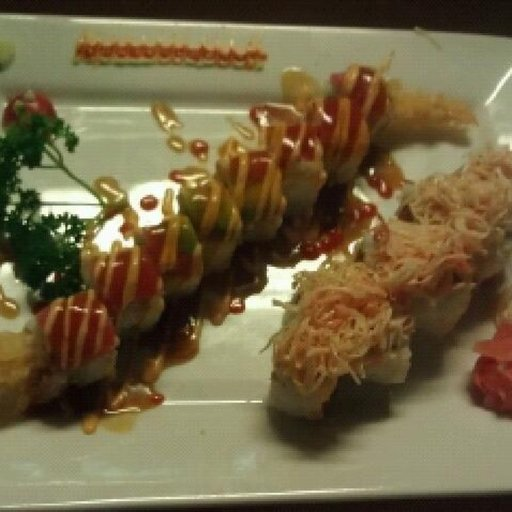

In [8]:
import random
from PIL import Image

#Seed
random.seed(42)

# 1. COnseguindo todos os caminhso das imagens
image_path_list = list(image_path.glob("*/*/*.jpg"))
#image_path_list

# 2. Escolhendo uma imagem aleatoria
random_image_path = random.choice(image_path_list)
#print(random_image_path)

# 3. Nome da classe apartir do paht name(A classe da imagem corresponde a pasta que a imagem se encontra)
image_class = random_image_path.parent.stem
#print(f"\n {image_class}")

# 4. Abrindo a imagem
img = Image.open(random_image_path)

# 5. Printando os metadados
print(f"Caminho da Imagem aleatoria: {random_image_path}")
print(f"Classe da Imagem: {image_class}")
print(f"Altura da Imagem: {img.height}")
print(f"Largura da Imagem: {img.width}")
img


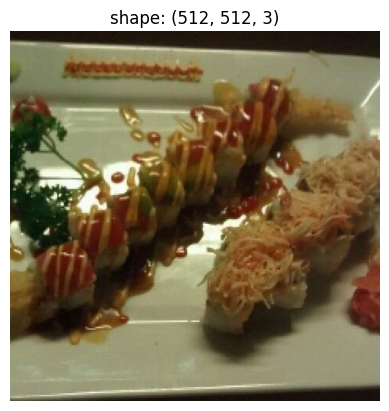

In [9]:
import matplotlib.pyplot as plt

#PAra carregar
ims_plt = plt.imread(random_image_path)

#Para exibir
plt.imshow(ims_plt)

#Removendo eixo
plt.axis("off")

plt.title(f"shape: {ims_plt.shape}")
# Mostrar a imagem
plt.show()

In [10]:
import numpy as np

def imagem_plt(imagem):

  img_as_array = np.asarray(imagem)

  plt.figure(figsize=(10, 7))
  plt.imshow(img_as_array)
  plt.title(f"Classe da Imagem: {image_class} | Shape da Imagem: {img_as_array.shape} -> [Altura, largura, canais]")
  plt.axis(False)


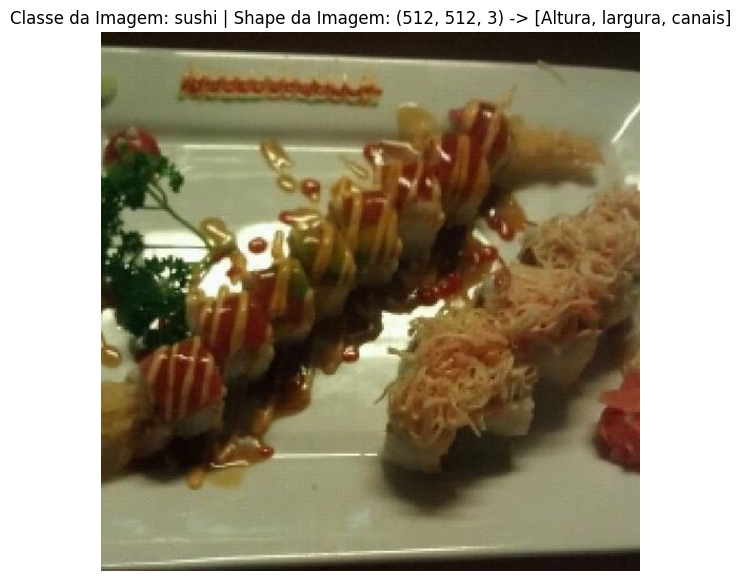

In [11]:
imagem_plt(img)

array([[[ 24,  17,   9],
        [ 26,  19,  11],
        [ 26,  19,  11],
        ...,
        [ 21,  16,  10],
        [ 21,  16,  10],
        [ 21,  16,  10]],

       [[ 26,  19,  11],
        [ 26,  19,  11],
        [ 26,  19,  11],
        ...,
        [ 22,  17,  11],
        [ 22,  17,  11],
        [ 22,  17,  11]],

       [[ 29,  20,  13],
        [ 28,  19,  12],
        [ 27,  18,  11],
        ...,
        [ 24,  19,  13],
        [ 24,  19,  13],
        [ 24,  19,  13]],

       ...,

       [[125, 125,  99],
        [122, 122,  96],
        [122, 122,  96],
        ...,
        [ 27,  16,  14],
        [ 27,  16,  14],
        [ 27,  16,  14]],

       [[ 95,  95,  71],
        [ 92,  92,  68],
        [ 90,  90,  66],
        ...,
        [ 26,  15,  13],
        [ 26,  15,  13],
        [ 26,  15,  13]],

       [[ 95,  95,  71],
        [ 90,  90,  66],
        [ 87,  87,  63],
        ...,
        [ 26,  15,  13],
        [ 26,  15,  13],
        [ 26,  15,  13]]], dtype=uint8)
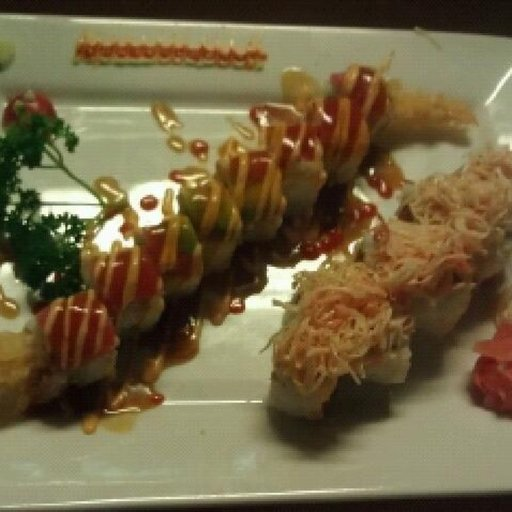

In [12]:
img_as_array = np.asarray(img)
img_as_array

## 3. Transformando os dados

ANtes de usar as imagens com o pytorch:
1. Deve se transformar os dados em tensor(representacao numerica das imagens)
2. Transforma em `torch.utils.data.Dataset` e subsequentemente em `torch.utils.DataLoader`, chamamos de Dataset e Dataloader

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transformand os dados com `torchvision.transfoms`

* jpg -> tensor

In [14]:
#Transformando uma imagem
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    #DEixando a imagem horizontal de maneira random
    transforms.RandomHorizontalFlip(p=0.5),
    #Transformando img em tensor
    transforms.ToTensor()
    ])

In [15]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [16]:
data_transform(img).dtype


torch.float32

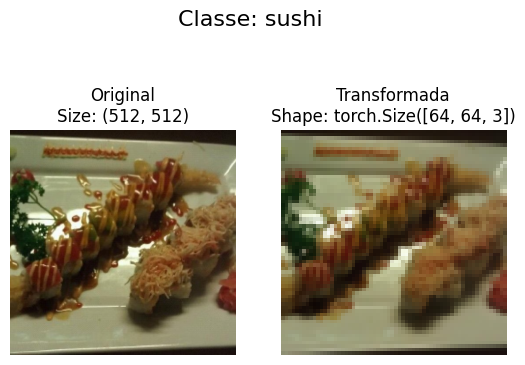

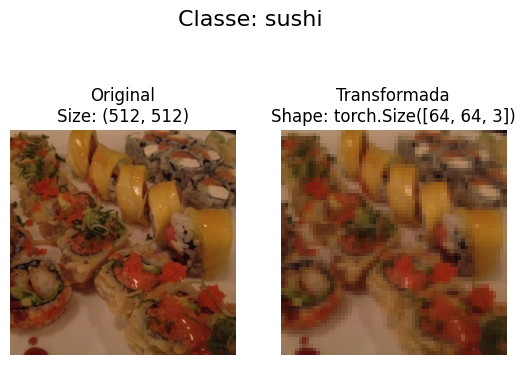

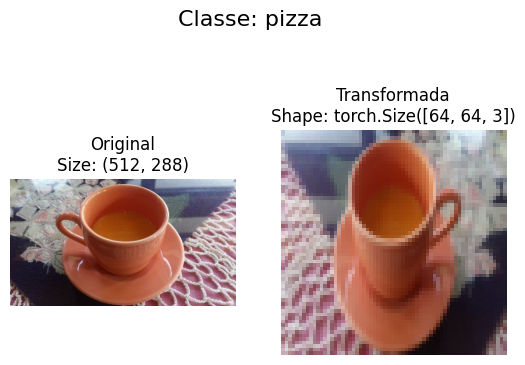

In [17]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Seleciona imagens aleatorias do cominho de imagens e carrega/transforma
  para entao plotar a original e a versao transformada
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      #Transformando e plotando a imagem
      transformed_image = transform(f).permute(1, 2, 0) #Permute para colocar os canais de cores por ultimo
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformada\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Classe: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)



## 4. Opcao 1: Carregando imagens usando `ImageFolder`

As imagens pode ser carregadas usando: `torchvision.datasets.ImageFolder`



In [18]:
#Usando o ImageFolder para criar os datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #Trasformado para os dados
                                  target_transform=None) #Trasformador para os labels/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [19]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_stake_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_stake_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
train_dir, test_dir

(PosixPath('data/pizza_stake_sushi/train'),
 PosixPath('data/pizza_stake_sushi/test'))

In [21]:
#Conseguindo os nomes das classes como list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [22]:
#Conseguindo os nomes das classes como dicionario
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [23]:
len(train_data), len(test_data)

(225, 75)

In [24]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [25]:
train_data.samples[0]

('data/pizza_stake_sushi/train/pizza/1008844.jpg', 0)

In [26]:
#Usando o index do train_data para pegar uma amostra e sua label
img, label = train_data[0][0], train_data[0][1]
print(f"Imagem como Tensor: {img}")
print(f"Shape da Imagem: {img.shape}")
print(f"Tipo de dado da imagem: {img.dtype}")
print(f"Rotulo da Imagem: {label}")
print(f"Tipo de dado do Rotulo: {type(label)}")

Imagem como Tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ...

In [27]:
label, class_names[label]

(0, 'pizza')

Shape Original: torch.Size([3, 64, 64]) -> [canais_cor, altura, largura]
Imagem Permutada: torch.Size([64, 64, 3]) -> [altura, largura, canais_cor]


Text(0.5, 1.0, 'pizza')

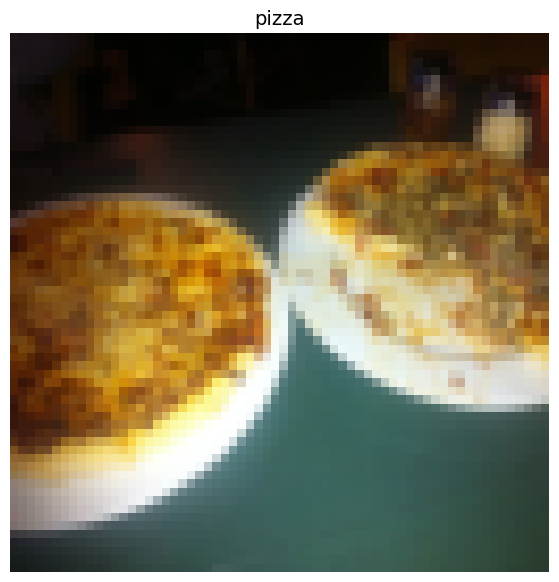

In [28]:
# Reordenara as dimensoes do tensor, pq matplotlib usar canais de cor por ultimo
img_permute = img.permute(1, 2, 0)


#VIsualizandos os formatos dos dados
print(f"Shape Original: {img.shape} -> [canais_cor, altura, largura]")
print(f"Imagem Permutada: {img_permute.shape} -> [altura, largura, canais_cor]")

#Visualizando o imagem
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### 4.1 Transformando as imagens carregadas em `DataLoader`

Um `DataLoader` vai ajudar a tranformar o `Dataset` em um iteravel e nos podemos personalizar o `batch_size` para que o modelo veja `batch_size's` por vez

In [29]:
import os
os.cpu_count()

2

In [30]:
#TRansformando os datasets de treino e teste em DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dfe8ea66d70>,
 <torch.utils.data.dataloader.DataLoader at 0x7dfe8ea65990>)

In [31]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [32]:
img, label = next(iter(train_dataloader))

#batch comecera em 1, dps se muda
print(f"Shape da Imagem: {img.shape} -> [batch_size, color_channels, height, witdh]")
print(f"Shape do Label: {label.shape}")


Shape da Imagem: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, witdh]
Shape do Label: torch.Size([1])


## 5. carregando as imagens com uma funcao propria

1. Deve ser capaz de carregar as imagens do arquivo
2. Deve ser capaz de conseguir o nome das classes do dataset
3. Deve ser capaz de conseguir as classes como dicionario do dataset

Pros:
* Pode ser criar um `Dataset` de qualquer coisa
* Nao fica limitado as funcoes pre-montadas do Pytorch

Contras:
* Nao e pq sepode criar um `Dataset` de qualquer coisa, quie isso ira funcionar
* Usar um `Dataset` customizado requer mais codigo, o que pode ocasionar erros e problemas de performace

In [33]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [35]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Criando funcoes auxiliares para conseguir o nome das classes

A funcao serve para:
1. Conseguir o nome das classes usando `os.scandir()` para percorrer o diretorio alvo(Idelamente os diretorio alvo esta da maneira padrao de formato para classicacao de imagens)
2. Levantar um error se os nomes das classes nao puderam ser achados( Caso ocorre, deve ter algo de errado com a estrutura do diretorio)
3. Transformar os nomes das classesem um diretorio e uma lista, e retornar eles.

In [37]:
#Configurando o caminho para o diretorio alvo
target_directory = train_dir
print(f"Diretorio Alvo: {target_directory}")

# COnseguindo os nomes das classes do diretorio alvo
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

DIretorio Alvo: data/pizza_stake_sushi/train


['pizza', 'steak', 'sushi']

In [39]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [40]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Encontra as pastas das classes no diretorio alvo"""
  # 1. COnsegue o nome das classes escaneando o diretorio alvo
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Erro de os nomes nao puderem ser achados
  if not classes:
    raise FileNotFoundError(f"Nao puderam ser achados classes no {directory}.... Cheque a estrutura dos arquivos")

  # 3. CRiando um dicionario dos index dos labels( o computador prefere numberos a strings para labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}


  return classes, class_to_idx